### Using 2016 Video Game Sales Data to Guide 2017 Marketing Decisions
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

##### Business Ask

The goal of this project is to understand which factors contribute to a video game's commercial success so the Ice online store can make smarter marketing decisions. By analyzing 2016 sales data, we want to identify the genres, platforms, and game characteristics that attract the most buyers. These insights will help Ice prioritize which upcoming titles to promote, allocate advertising budgets more effectively, and focus on the segments most likely to drive strong sales in 2017.

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
games_url = "https://raw.githubusercontent.com/the-buike/game-sales-trends-2016-2017/refs/heads/main/games.csv"
games = pd.read_csv(games_url)

In [4]:
# Display the first few rows of the dataset
games.head(500)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,Super Mario World 2: Yoshi's Island,GBA,2002.0,Platform,1.75,0.45,0.62,0.09,NaN,NaN,NaN
496,Mass Effect,X360,2007.0,Role-Playing,1.83,0.79,0.03,0.27,91.0,8.7,M
497,Sonic Mega Collection Plus,PS2,2004.0,Misc,1.54,1.14,0.00,0.22,73.0,8.6,E
498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,0.08,1.24,1.13,0.45,93.0,9,E


In [5]:
# Display basic information about the dataset
def check_dataframe(df):
    print("DATAFRAME INFO")
    print("-" * 40)
    df.info()
    
    print("\n\nDATAFRAME DESCRIPTION")
    print("-" * 40)
    display(df.describe())
    print("\n\nDATAFRAME SHAPE")
    print("-" * 40)
    display(df.shape)

check_dataframe(games)

DATAFRAME INFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


DATAFRAME DESCRIPTION
----------------------------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000




DATAFRAME SHAPE
----------------------------------------


(16715, 11)

In [6]:
# Check for missing values in the dataset
def missing_values(df):
    print("MISSING VALUES")
    print("-" * 40)
    total = len(df)
    missing = total - df.count()
    return missing

missing_values(games)

MISSING VALUES
----------------------------------------


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# Check for duplicate entries
def check_duplicates(df):
    print("DUPLICATE ENTRIES")
    print("-" * 40)
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate entries: {duplicates}")

check_duplicates(games)


DUPLICATE ENTRIES
----------------------------------------
Number of duplicate entries: 0


#### Initial Data Review Summary

The dataset contains 16,715 unique game records, and no duplicate rows were found, ensuring each entry represents a distinct title. The overall structure is stable, and the dataset is suitable for analysis.

The data includes a mix of text fields (name, genre, platform, rating) and numeric fields (regional sales, critic score, user score, release year). A few datatype issues need attention. The Year_of_Release column is currently stored as a float, which occurs because missing values force pandas to treat the entire column as decimal. Since years should be whole numbers, this column will need to be converted to integer after the missing years are handled.

The Critic_Score column also appears as float, but all values follow a 00.0 format, indicating they represent normalized percentage style scores on a 0–100 scale. These should be converted to integer as part of the cleaning process.

While reviewing User_Score, a notable inconsistency appeared. The column is stored as an object instead of a numeric type, which triggered further investigation. Inspecting the values revealed that in addition to numeric ratings like 4.3 or 7.8, the column contains non numeric placeholders such as "tbd" (to be determined). These entries prevent the column from being recognized as numeric. This confirms that User_Score should remain a float, but the non numeric entries must be cleaned or replaced before conversion.

A few missing values were identified: 2 missing names, 2 missing genres, and 269 missing release years, which will impact time based analysis. Larger gaps appear in the review related fields, with over 8,500 missing critic scores, more than 6,700 missing user scores, and a similar number of missing ESRB ratings. These gaps are expected, as not all games receive reviews or official ratings.

Overall, the dataset is in good condition. The primary cleaning steps will involve resolving missing year values, converting the year and critic score columns to the correct datatypes, addressing non numeric user score entries, and standardizing column naming for consistency.

Overall, the dataset is in good shape for exploration. The main issues to address include:

* the float format of the year field and Critic_score

* the missing year values

* the few missing names/genres

* and the inconsistent naming format across columns

In [8]:
#Make a copy of the dataframe
games_df = games.copy()
display(games_df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# Convert column names to lowercase
games.columns = [col.lower() for col in games.columns]

# Verify the changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# Check current data types
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [11]:
#Change the year_of_release and critic_score column to integer type with function
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games.dtypes
# Verify the changes
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [12]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
#Figure out why user_score is in object type
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
(games['user_score'] == 'tbd').sum()

np.int64(2424)

#### Summary of Findings For "User_score"

During the initial audit of the dataset, one key quality issue surfaced in the User_Score column. While user ratings should be numeric values on a 0–10 scale, the column is stored as an object type. A closer inspection showed that alongside valid numeric ratings (such as 4.3 or 7.8), the dataset also contains non numeric placeholders labeled "tbd" (to be determined). These entries typically appear when a game has not yet received enough user ratings to generate a score.

The presence of "tbd" values explains why the column did not automatically convert to a numeric datatype. Importantly, this is a common characteristic of video game review datasets. Not all titles receive user reviews, especially niche games, less popular releases, or titles launched late in the year.

##### Decision

After reviewing industry standards and considering the goals of this project, the decision is not to drop any rows containing "tbd". Removing these entries would eliminate 2,424 games, which would bias the analysis toward only the most popular and highly reviewed titles. This would distort the overall picture of the market and reduce the reliability of any insights used to plan advertising strategies for 2017.

Instead, the chosen approach is to:

* Convert all non numeric entries, including "tbd", to NaN

This keeps the dataset intact while making the User_Score column fully numeric and ready for analysis.

* Retain all rows, even those without user ratings

Missing user scores are normal and expected, and they do not prevent meaningful analysis of other features such as genre, platform, critic score, or sales.

* Treat missing user ratings as part of the real landscape

The absence of user feedback itself can be informative. It often reflects low visibility or limited player engagement, which are important factors in game performance.

In [14]:
#force convert user_score to numeric, setting errors='coerce' to handle 'tbd' values
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].dtype

dtype('float64')

Next we will examine missing values to determine what to do with them

In [15]:
#check for missing values again after conversion
missing_values(games)

MISSING VALUES
----------------------------------------


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
# Calculate percentage of missing values
total_rows = len(games)
missing_percentage = (missing_values(games) / total_rows) * 100
missing_percentage

MISSING VALUES
----------------------------------------


name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

### Summary of Missing Data Decisions

A review of missing values shows that only a small number of essential fields are incomplete. Rows missing a game name (2) or genre (2) will be removed, since these identifiers are required for any meaningful analysis.

All other missing values will be kept. This includes the 269 missing release years, 8,578 missing critic scores, and 9,125 missing user scores. These gaps are considered normal in video game datasets, where not all titles receive reviews or ratings. Removing these rows would eliminate a large portion of the dataset and create significant bias toward only well reviewed or popular games.

Keeping these rows ensures that the analysis reflects the full landscape of the market and maintains the integrity of trends across genres, platforms, and regions.

In [17]:
# Handle missing values based on analysis
# function that prints missing rows in object type columns
def show_missing_rows(df, column):
    """
    Print and return all rows where the given column is missing.
    Only intended for object (string) columns.
    """
    if df[column].dtype != "O":
        print(f"Warning: {column} is not an object column. Current dtype: {df[column].dtype}")
    
    missing_rows = df[df[column].isna()]
    
    print(f"Column: {column}")
    print(f"Number of missing rows: {missing_rows.shape[0]}")
    print("\nSample of rows with missing values:")
    print(missing_rows.head())
    
    return missing_rows

# Check missing rows in 'name' column
show_missing_rows(games, 'name')
show_missing_rows(games, 'genre')



Column: name
Number of missing rows: 2

Sample of rows with missing values:
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08          <NA>         NaN    NaN  
14244         0.00          <NA>         NaN    NaN  
Column: genre
Number of missing rows: 2

Sample of rows with missing values:
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08          <NA>         NaN    NaN  
14244         0.00          <NA>         NaN    NaN  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


#### Findings

The rows with missing values in the Name column are the same rows that have missing values in the Genre column. Since both issues occur in the exact same entries, dropping the missing rows for Name automatically resolves the missing values for Genre as well. No additional drops are required for Genre.

In [18]:
#Drop missing rows in 'name' and 'genre' columns
games = games.dropna(subset=['name', 'genre'])

show_missing_rows(games, 'name')
show_missing_rows(games, 'genre')

Column: name
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Column: genre
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Key Insight

Because both the Name and Genre are missing in the same rows, it strongly suggests the issue is not random but tied to those specific entries being incomplete or corrupted.

And since a game without a name or genre has no analytical value, dropping them was the appropriate and industry standard action.

## Next steps

With the initial data quality checks and cleaning decisions completed, the next phase of the analysis will focus on preparing the dataset for deeper exploration. The first step will be to create a Total_Sales column by combining regional sales figures. This will provide a single, consolidated metric that captures each game's overall commercial performance.

This metric will be used throughout the exploratory analysis to understand overall commercial performance across titles, genres, platforms, and regions.

To ensure accuracy, Total Sales will not be rounded during the data preparation phase. Sales values in the dataset are expressed in millions and often include meaningful decimal precision. Small differences, such as 1.54 million versus 1.49 million, can impact comparisons between games and influence trend interpretations. Rounding too early would reduce detail and may introduce distortions in summary statistics, rankings, or visual insights.

Once the total sales metric is in place, we will begin the exploratory data analysis (EDA) phase. This will include examining sales distributions, identifying high performing genres and platforms, and evaluating patterns across different regions. These insights will help us understand market behavior, highlight growth opportunities, and guide strategic decisions for planning future game promotions and advertising efforts.

In [19]:
# Calculate for total sales column
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Next step

With the Total Sales column created, we will now begin a temporal analysis to understand how game sales have changed over the years within this dataset. By examining sales trends across different release periods, we can see how the market represented in our data has evolved and identify patterns that may inform planning for upcoming game promotions.

In [20]:
# Create a DataFrame with game releases by year
games_by_year = games.groupby('year_of_release').size().reset_index(name='number_of_games')
games_by_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


C:\Users\bukky\AppData\Local\Temp\ipykernel_18796\255428230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=games_by_year, x='year_of_release', y='number_of_games', palette='viridis')


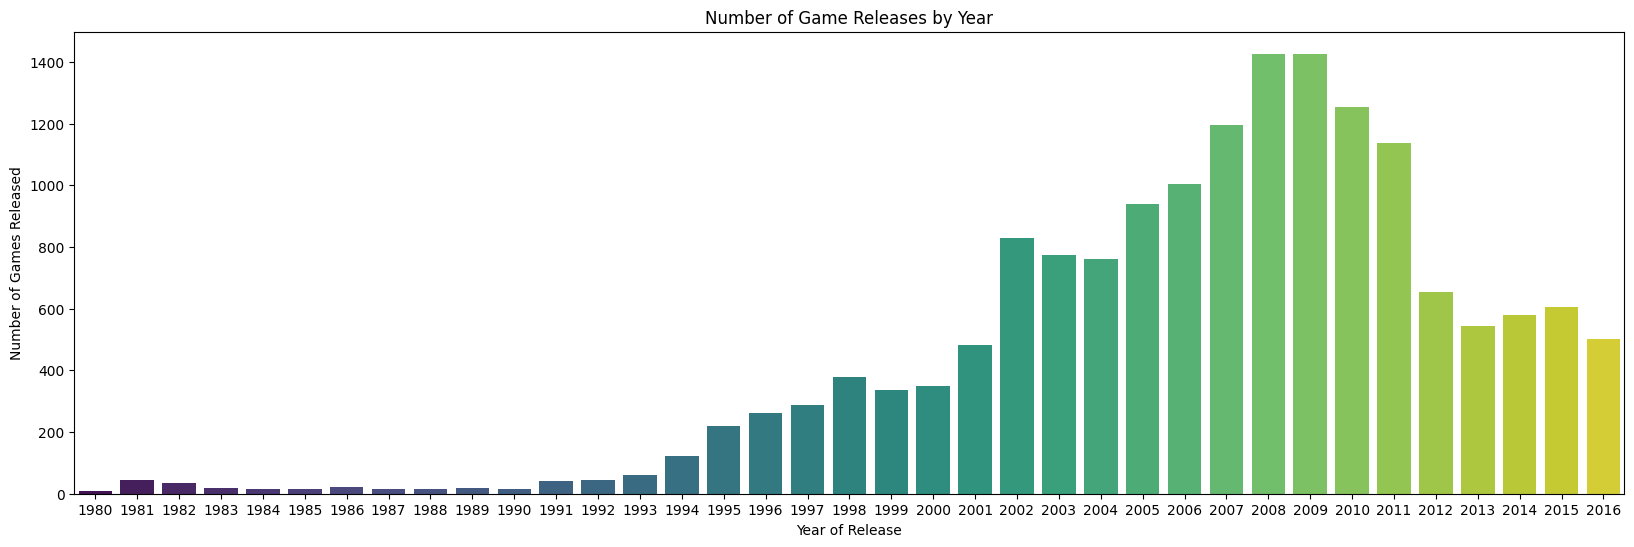

In [21]:
## Visualize the distribution of games across years
plt.figure(figsize=(20, 6))
sns.barplot(data=games_by_year, x='year_of_release', y='number_of_games', palette='viridis')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()

#### Game Releases Over Time - Summary

Looking at the number of game releases each year in this dataset, there's a pretty clear pattern. Things start slow in the early 80s and 90s, then releases really explode in the 2000s. The busiest stretch is 2005 to 2010 - we're talking hundreds of titles every year, with 2008 hitting over 1,400 games.

After that peak, things start dropping off. By 2016, we're down to around 500 games. Could be shifts in how games are made, Introduction of new modes of gaming (like mobile device gaming), changes in distribution, or just how this dataset tracks things.

For what we're doing, this trend matters because it shows us what the landscape looks like going into 2017. The market's not nearly as packed as it was during that mid-2000s boom, so new titles coming to the store actually have a better shot at getting noticed. Good context to have as we figure out which games are worth pushing in 2017.

In [22]:
# Display summary statistics for each year
games.groupby('year_of_release').agg({
    'total_sales': ['mean', 'median', 'sum'],
    'critic_score': ['mean', 'median'],
    'user_score': ['mean', 'median']
}).reset_index()

year_of_release total_sales                critic_score        user_score  \
                          mean median     sum         mean median       mean   
0             1980    1.264444  0.770   11.38         <NA>   <NA>        NaN   
1             1981    0.775652  0.465   35.68         <NA>   <NA>        NaN   
2             1982    0.802222  0.540   28.88         <NA>   <NA>        NaN   
3             1983    0.988235  0.770   16.80         <NA>   <NA>        NaN   
4             1984    3.596429  1.485   50.35         <NA>   <NA>        NaN   
5             1985    3.853571  1.015   53.95         59.0   59.0   5.800000   
6             1986    1.765714  1.360   37.08         <NA>   <NA>        NaN   
7             1987    1.356250  0.885   21.70         <NA>   <NA>        NaN   
8             1988    3.147333  1.510   47.21         64.0   64.0   2.200000   
9             1989    4.320588  1.610   73.45         <NA>   <NA>        NaN   
10            1990    3.085625  1.520   49.37         <NA>   <NA>        NaN   
11            1991    0.786098  0.380   32.23         <NA>   <NA>        NaN   
12            1992    1.771163  0.790   76.16         85.0   85.0   8.200000   
13            1993    0.766500  0.355   45.99         <NA>   <NA>        NaN   
14            1994    0.654793  0.270   79.23         69.0   69.0   6.300000   
15            1995    0.402374  0.140   88.12         <NA>   <NA>        NaN   
16            1996    0.757224  0.210  199.15       89.875   91.0   8.400000   
17            1997    0.695744  0.280  201.07    85.294118   85.0   8.472222   
18            1998    0.676280  0.260  256.31    81.821429   84.0   8.506452   
19            1999    0.742929  0.305  251.11    75.769231   80.0   8.480645   
20            2000    0.576171  0.250  201.66     69.34965   72.0   7.531776   
21            2001    0.687676  0.250  331.46     71.41411   73.0   7.594942   
22            2002    0.476441  0.170  394.97    69.046252   71.0   7.585129   
23            2003    0.461342  0.190  357.54    70.181197   71.0   7.859884   
24            2004    0.549449  0.210  418.68    69.393939   70.0   7.750511   
25            2005    0.487561  0.170  457.82    68.819847   70.0   7.509605   
26            2006    0.514622  0.110  517.71     67.33871   69.0   7.247283   
27            2007    0.505221  0.150  604.75    66.180636   68.0   6.895707   
28            2008    0.470568  0.160  671.50    65.904895   68.0   6.950983   
29            2009    0.462006  0.150  658.82    67.554531   69.0   6.990717   
30            2010    0.470223  0.140  590.13       67.482   70.0   6.875375   
31            2011    0.446813  0.130  507.58       68.692   70.0   6.623553   
32            2012    0.544931  0.170  355.84    72.984424   75.0   6.817404   
33            2013    0.664044  0.190  361.24    71.278388   75.0   6.470724   
34            2014    0.570620  0.160  331.53    71.065134   73.0   6.580243   
35            2015    0.442211  0.090  267.98    72.871111   74.0   6.665993   
36            2016    0.258845  0.060  129.94    73.155172   74.5   6.629771   

           
   median  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5    5.80  
6     NaN  
7     NaN  
8    2.20  
9     NaN  
10    NaN  
11    NaN  
12   8.20  
13    NaN  
14   6.30  
15    NaN  
16   8.65  
17   8.30  
18   8.60  
19   8.80  
20   7.90  
21   8.00  
22   7.90  
23   8.20  
24   8.10  
25   7.80  
26   7.50  
27   7.20  
28   7.30  
29   7.30  
30   7.20  
31   6.90  
32   7.10  
33   6.80  
34   7.00  
35   7.10  
36   7.00

#### Sales Distribution Insight

Looking at the yearly summary stats, it's clear that game sales in this dataset are positively skewed. Basically, a few big hits are doing most of the heavy lifting. In most years, the mean is way higher than the median, which tells us that a handful of blockbusters are massively outperforming everything else.

This lines up with what we know about the gaming market in general. A few titles blow up, and most games just do okay or underperform.

For our 2017 planning, this matters because we need to set realistic expectations. If we want strong results, we need to spot and push the games that actually have a shot at being above average, not just treat everything like it'll perform the same.
Keeping this skew in mind means we focus our marketing on the high-impact opportunities instead of spreading ourselves thin.

#### Next Steps: Platform Sales Analysis Over Time

With our understanding of overall release trends and yearly sales patterns established, the next step is to examine how individual platforms have performed over time. This part of the analysis will help us identify which platforms are growing, which ones are declining, and where the strongest sales opportunities may exist as we plan for 2017.

By looking at platform level sales across multiple years, we can:

* Highlight platforms that consistently drive strong revenue

* Identify emerging platforms that may deserve more attention

* Spot platforms that are losing momentum and may not justify heavy marketing investment

* Understand how shifts in consumer preferences and new console cycles influence sales performance

This deeper look at platform trends will provide important insight into where Ice should focus its efforts when selecting games to promote in 2017. It will also help us assess the competitive landscape and understand which platforms offer the highest potential return on investment.



In [23]:
# Calculate total sales by platform and year sorted by top 10 and lower 10
sales_by_platform_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
top_10_sales = sales_by_platform_year.sort_values(by='total_sales', ascending=False).head(15)
lower_10_sales = sales_by_platform_year.sort_values(by='total_sales', ascending=True).head(15)
display(top_10_sales)
display(lower_10_sales)

,platform,year_of_release,total_sales
134,PS2,2004,211.81
200,Wii,2009,206.97
132,PS2,2002,205.38
133,PS2,2003,184.31
199,Wii,2008,171.32
218,X360,2010,170.03
124,PS,1998,169.49
131,PS2,2001,166.43
135,PS2,2005,160.66
147,PS3,2011,156.78


,platform,year_of_release,total_sales
10,3DO,1994,0.02
23,DC,2007,0.02
25,DS,1985,0.02
94,PC,1988,0.03
119,PCFX,1996,0.03
93,PC,1985,0.04
69,GG,1992,0.04
24,DC,2008,0.04
49,GBA,2000,0.07
11,3DO,1995,0.08


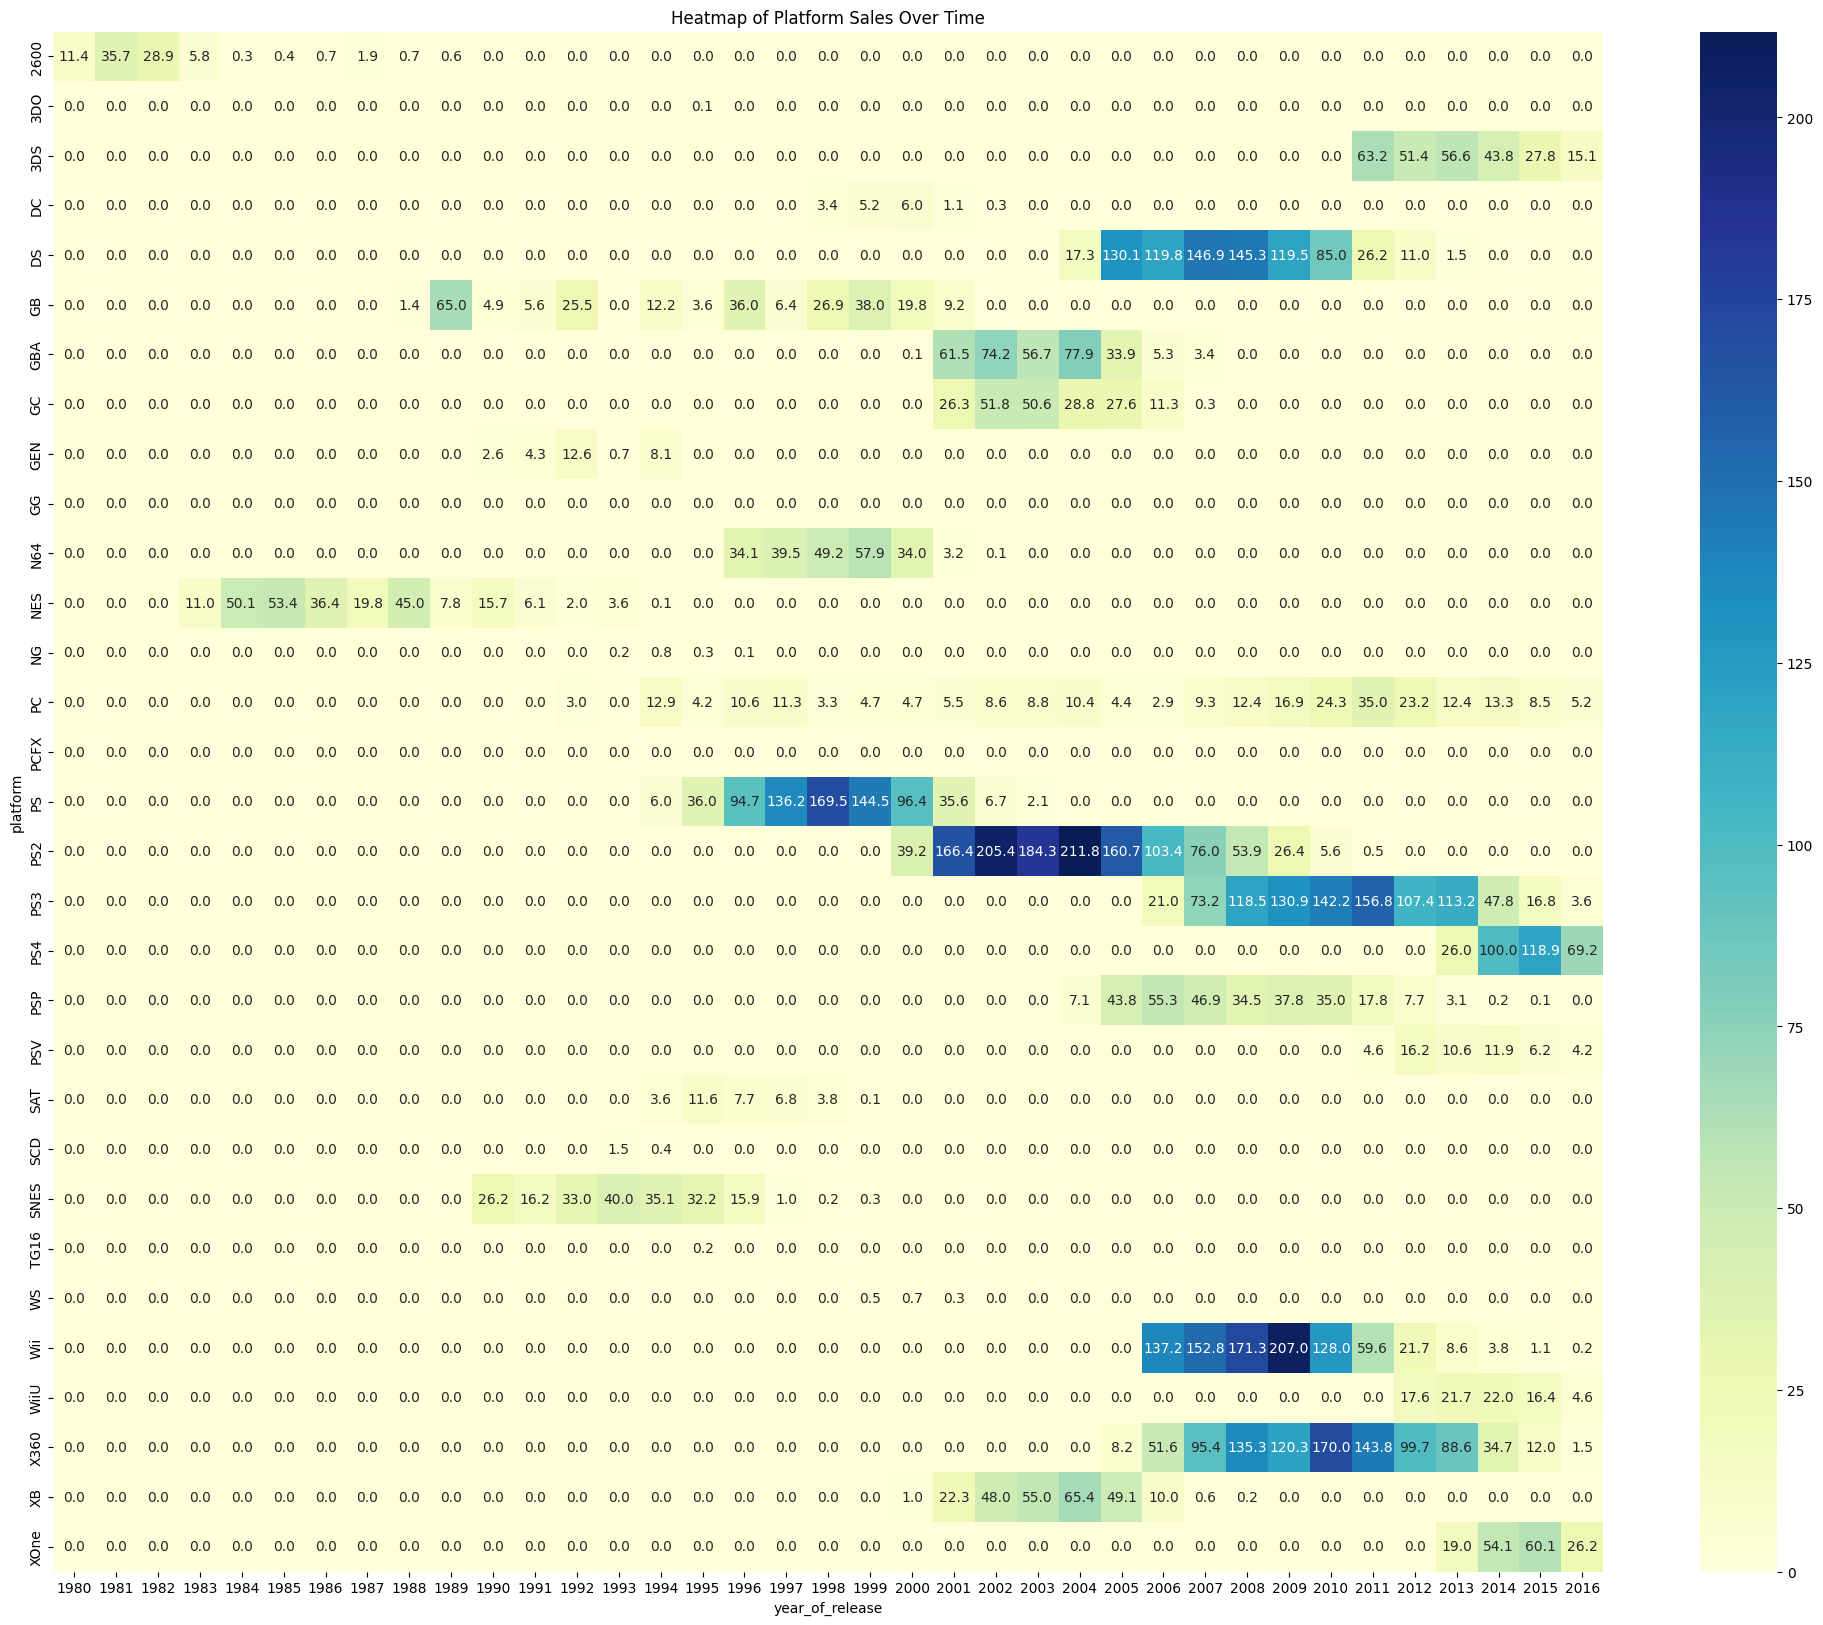

In [24]:
# Create a heatmap of platform sales over time
plt.figure(figsize=(25, 20))
sales_pivot = sales_by_platform_year.pivot(index='platform', columns='year_of_release', values='total_sales').fillna(0)
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Heatmap of Platform Sales Over Time')
plt.show()

##### Platform Performance Interpretation

Looking at the platform data, there is a clear gap between systems that barely made an impact and those that dominated the market. The lower performing platforms, like 3DO, PCFX, GG, and some early years for DS and PC, show very small sales numbers. Most of them do not even cross 0.05 million units. This tells us these platforms had limited reach, short lifespans, or very small audiences. They do not contribute much to overall market activity and are not worth focusing on for any strategic planning.

On the other side, the top performing platforms show where the real sales power is. Systems like the PS2, Wii, PS1, PS3, and Xbox 360 recorded some of the highest totals in the entire dataset. Many of these years sit well above 150 million units in sales. The PS2 appears several times, which matches its reputation as one of the best selling consoles ever. The Wii also had huge years, showing how strong consumer interest was during its peak.

Putting this together, it is clear that a small set of major platforms drive most of the revenue. For planning around 2017, it makes sense to focus on titles released on these stronger platforms. They have proven demand and a track record of generating real sales, which gives us a solid foundation for choosing which games to promote.

#### Next steps

Based on the analysis above, i will be determining the appropriate time period for predicticting 2017 sales:




In [25]:
# choose relevant years
relevant_years = [2014, 2015, 2016]
games_relevant = games[games['year_of_release'].isin(relevant_years)]
games_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [26]:
# justify why these years were chosen with data
#Create a summary by year: number of games and sales stats
year_summary = (
    games
    .groupby("year_of_release", as_index=False)
    .agg(
        number_of_games=("name", "count"),
        total_sales_sum=("total_sales", "sum"),
        total_sales_mean=("total_sales", "mean"),
        total_sales_median=("total_sales", "median")
    )
    .sort_values("year_of_release")
)

print("Full year summary (head):")
display(year_summary.head())
print("\nFull year summary (tail):")
display(year_summary.tail())


Full year summary (head):


,year_of_release,number_of_games,total_sales_sum,total_sales_mean,total_sales_median
0,1980,9,11.38,1.264444,0.770
1,1981,46,35.68,0.775652,0.465
2,1982,36,28.88,0.802222,0.540
3,1983,17,16.80,0.988235,0.770
4,1984,14,50.35,3.596429,1.485



Full year summary (tail):


,year_of_release,number_of_games,total_sales_sum,total_sales_mean,total_sales_median
32,2012,653,355.84,0.544931,0.17
33,2013,544,361.24,0.664044,0.19
34,2014,581,331.53,0.570620,0.16
35,2015,606,267.98,0.442211,0.09
36,2016,502,129.94,0.258845,0.06


In [27]:
#Look at the last 10 years in the dataset
last_10_years = year_summary[year_summary["year_of_release"] >= 
                             year_summary["year_of_release"].max() - 9]

print("\nLast 10 years in the dataset:")
display(last_10_years)

#Zoom in on 2014 to 2016
recent_window = year_summary[year_summary["year_of_release"].between(2014, 2016)]
print("\nSelected window for 2017 planning (2014–2016):")
display(recent_window)

#Compare 2014–2016 to all earlier years
before_window = year_summary[year_summary["year_of_release"] < 2014]

print("\nAverage stats before 2014:")
display(before_window[["number_of_games", "total_sales_mean", "total_sales_median"]].mean())

print("\nAverage stats for 2014–2016:")
display(recent_window[["number_of_games", "total_sales_mean", "total_sales_median"]].mean())


Last 10 years in the dataset:


,year_of_release,number_of_games,total_sales_sum,total_sales_mean,total_sales_median
27,2007,1197,604.75,0.505221,0.15
28,2008,1427,671.50,0.470568,0.16
29,2009,1426,658.82,0.462006,0.15
30,2010,1255,590.13,0.470223,0.14
31,2011,1136,507.58,0.446813,0.13
32,2012,653,355.84,0.544931,0.17
33,2013,544,361.24,0.664044,0.19
34,2014,581,331.53,0.570620,0.16
35,2015,606,267.98,0.442211,0.09
36,2016,502,129.94,0.258845,0.06



Selected window for 2017 planning (2014–2016):


,year_of_release,number_of_games,total_sales_sum,total_sales_mean,total_sales_median
34,2014,581,331.53,0.570620,0.16
35,2015,606,267.98,0.442211,0.09
36,2016,502,129.94,0.258845,0.06



Average stats before 2014:


number_of_games       433.970588
total_sales_mean        1.162536
total_sales_median      0.510588
dtype: float64


Average stats for 2014–2016:


number_of_games       563.000000
total_sales_mean        0.423892
total_sales_median      0.103333
dtype: float64

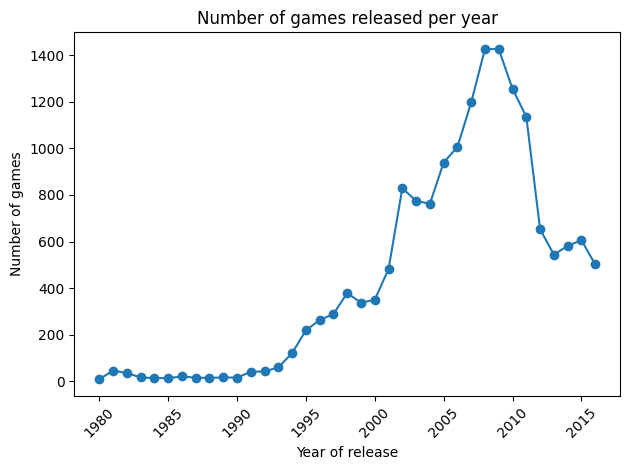

In [28]:
# Visualize the number of games released per year
fig, ax = plt.subplots()
ax.plot(year_summary["year_of_release"], year_summary["number_of_games"], marker="o")
ax.set_xlabel("Year of release")
ax.set_ylabel("Number of games")
ax.set_title("Number of games released per year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

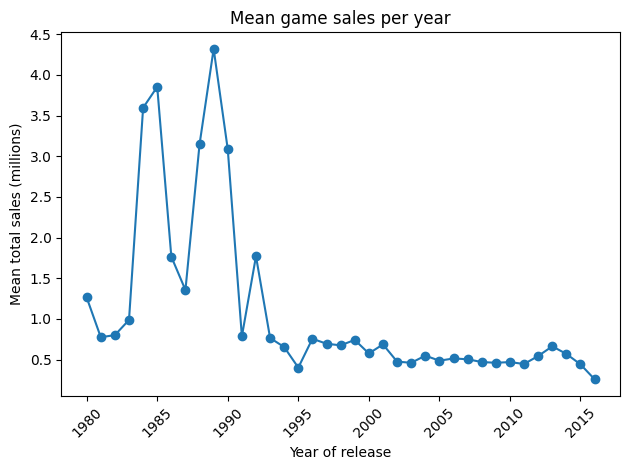

In [29]:

# Visualize the mean total sales per year
fig, ax = plt.subplots()
ax.plot(year_summary["year_of_release"], year_summary["total_sales_mean"], marker="o")
ax.set_xlabel("Year of release")
ax.set_ylabel("Mean total sales (millions)")
ax.set_title("Mean game sales per year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Interpretation of Sales Trends from 2007 to 2016

The data gives us a clear picture of how total game sales and market activity have shifted over the last decade leading into 2017. The years from 2007 to 2011 show the strongest performance in the dataset. During this period, the market was very active, with over 1,100 releases each year and total annual sales consistently above 500 million units. This was the peak of the console boom, with platforms like the Wii, PS2, PS3, and Xbox 360 driving high engagement and strong commercial results.

Beginning around 2012, we start to see steady changes. The number of releases drops from more than 1,100 a year down to 653 in 2012 and continues falling through 2016. Even though the number of games decreases, average sales per game in some years actually increase. For example, in 2013 and 2014, the mean sales rise to 0.66 and 0.57 million units. This suggests that while fewer games were released, the ones that did come out were slightly stronger performers on average.

The most important trend for our 2017 planning appears in the final three years. Between 2014 and 2016, the market becomes more stable but also more selective. Total annual sales drop sharply from 331 million units in 2014 to 129 million units in 2016. Median sales drop as well, showing that fewer games are reaching meaningful volume. This tells us the market is tightening, and only a smaller set of titles are capturing most of the consumer attention.

When we compare 2014 to 2016 with the broader period, it becomes clear that these three years give the most accurate look at the current sales environment. The earlier years reflect a very different market structure with higher volume and stronger overall sales. The later years show how the market has evolved, which is exactly the context we need to plan effectively for 2017.


#### What This Means for 2017 Strategy

* The market is producing fewer games each year, which reduces competition but also reduces total demand.

* Average sales per game in recent years are lower and more volatile, meaning not every title performs well.

* Only a select group of titles are driving meaningful sales, so promotional decisions need to focus on high potential games rather than broad coverage.

* Using 2014 to 2016 as the reference period provides the most realistic expectations for how 2017 is likely to behave.



#### Next Steps: Platform Performance Analysis for 2014 to 2016

Now that we have 2014, 2015, and 2016 as our key years, the next step is to look at how each platform performed during this period. This will help us see which platforms were still strong heading into 2017 and which ones were losing momentum.

We will compare total sales, the number of releases, and average sales per game. This gives us a clear picture of where demand is highest and which platforms are worth focusing on.

Platforms that stay consistent across these years are better candidates for promotion in 2017, while declining platforms may need a more careful approach. This sets us up to make smarter, data driven decisions moving forward.

In [31]:
# Analyze platform sales trends
# Sort platforms by total sales
platform_sales = (
    games_relevant
    .groupby(["platform", "year_of_release"], as_index=False)
    .agg(total_sales=("total_sales", "sum"))
    .sort_values("total_sales", ascending=False)
)
platform_sales

,platform,year_of_release,total_sales
10,PS4,2015,118.90
9,PS4,2014,100.00
11,PS4,2016,69.25
27,XOne,2015,60.14
26,XOne,2014,54.07
6,PS3,2014,47.76
0,3DS,2014,43.76
23,X360,2014,34.74
1,3DS,2015,27.78
28,XOne,2016,26.15


In [33]:
# Calculate year-over-year growth for each platform
platform_sales['yearly_growth'] = platform_sales.groupby('platform')['total_sales'].pct_change() * 100
platform_sales


,platform,year_of_release,total_sales,yearly_growth
10,PS4,2015,118.90,NaN
9,PS4,2014,100.00,-15.895711
11,PS4,2016,69.25,-30.750000
27,XOne,2015,60.14,NaN
26,XOne,2014,54.07,-10.093116
6,PS3,2014,47.76,NaN
0,3DS,2014,43.76,NaN
23,X360,2014,34.74,NaN
1,3DS,2015,27.78,-36.517367
28,XOne,2016,26.15,-51.636767


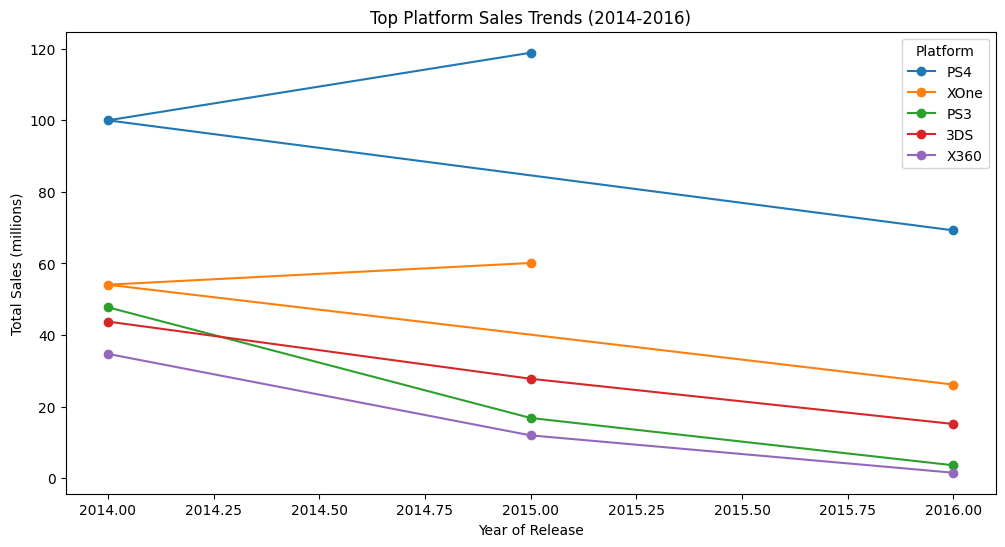

In [37]:
# Visualize top platforms
top_platforms = platform_sales['platform'].unique()[:5]
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)
plt.title('Top Platform Sales Trends (2014-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.show()

#### Stakeholder Summary: Platform Sales Trends

The sales trends from 2014 to 2016 show a clear shift in the market. The PS4 is the strongest platform throughout these years. It peaks in 2015 and drops in 2016, but it still stays far ahead of every other system. Xbox One follows the same pattern with a slight rise and then a sharp decline, yet it remains a top performer.

Older platforms like the PS3, 3DS, and Xbox 360 fall off quickly during this period. By 2016, their sales are very low, which tells us they are at the end of their lifespan and not worth focusing on.

Overall, the data shows that the market is moving toward newer consoles, with PS4 and Xbox One carrying most of the momentum. For 2017, it makes more sense to put our attention on these platforms rather than those that are clearly declining.

#### Next Steps: Sales Distribution Analysis

Now that we understand how each platform performed across the selected years, the next step is to look at how sales are actually distributed across individual games. This will help us see whether sales are concentrated among a few top titles or spread out more evenly across the market. By analyzing the shape of the distribution, we can get a better sense of how competitive the market is and what kind of sales performance we should realistically expect from most games in 2017. This will also help us identify outliers, typical ranges, and the overall spread of game performance.

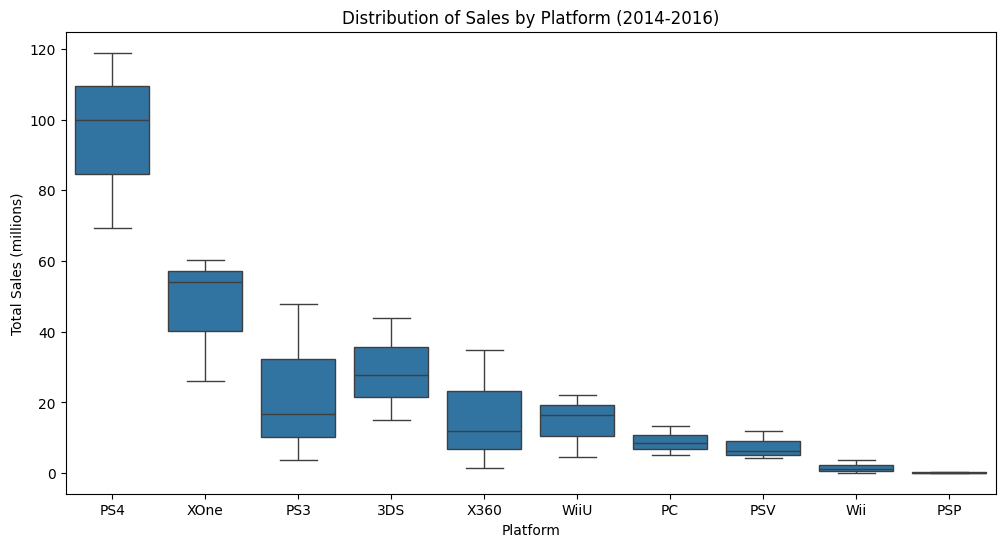

In [38]:
# Create box plot of sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(data=platform_sales, x='platform', y='total_sales')
plt.title('Distribution of Sales by Platform (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

In [39]:
# Calculate detailed statistics for each platform
platform_stats = (
    platform_sales
    .groupby('platform', as_index=False)
    .agg(
        total_sales_sum=('total_sales', 'sum'),
        total_sales_mean=('total_sales', 'mean'),
        total_sales_median=('total_sales', 'median'),
        sales_std_dev=('total_sales', 'std')
    )
    .sort_values('total_sales_sum', ascending=False)
)
print("Platform Sales Statistics:")
display(platform_stats)

Platform Sales Statistics:


,platform,total_sales_sum,total_sales_mean,total_sales_median,sales_std_dev
3,PS4,288.15,96.050000,100.00,25.059579
9,XOne,140.36,46.786667,54.07,18.127748
0,3DS,86.68,28.893333,27.78,14.342445
2,PS3,68.18,22.726667,16.82,22.664795
8,X360,48.22,16.073333,11.96,16.987694
7,WiiU,42.98,14.326667,16.35,8.889411
1,PC,27.05,9.016667,8.52,4.037974
5,PSV,22.40,7.466667,6.25,3.967472
6,Wii,5.07,1.690000,1.14,1.847458
4,PSP,0.36,0.180000,0.18,0.084853


##### Stakeholder Summary: Sales Distribution by Platform

The sales distribution from 2014 to 2016 shows a clear separation between the platforms that are still driving the market and those that are no longer competitive. PS4 has the strongest and most consistent performance, with high sales across all three years. Xbox One also performs well, although at a slightly lower level.

Older platforms like PS3, 3DS, and Xbox 360 show a noticeable decline, and their sales ranges sit much lower. Platforms such as WiiU, PC, PSV, Wii, and PSP have very small distributions, confirming that they no longer contribute meaningful sales.

Overall, the chart reinforces that PS4 and Xbox One are the only platforms still showing strong demand during this period. These systems offer the best opportunities for 2017 promotions, while the declining and low performing platforms should not be a focus.

##### Next Steps: Review Score Impact Analysis

With the platform trends established, the next step is to look at how review scores affect game sales. To keep the analysis focused and meaningful, we will choose one of the top platforms from our earlier findings. Since PS4 consistently showed the strongest performance, it makes the most sense to use it as our reference platform. By analyzing how critic and user scores impact sales on PS4, we can get a clearer picture of how much reviews matter and whether they help us spot potential high performing games for 2017.

In [40]:
# Choose a popular platform based on your previous analysis
popular_platform = 'PS4'
popular_platform_data = games_relevant[games_relevant['platform'] == popular_platform]
popular_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


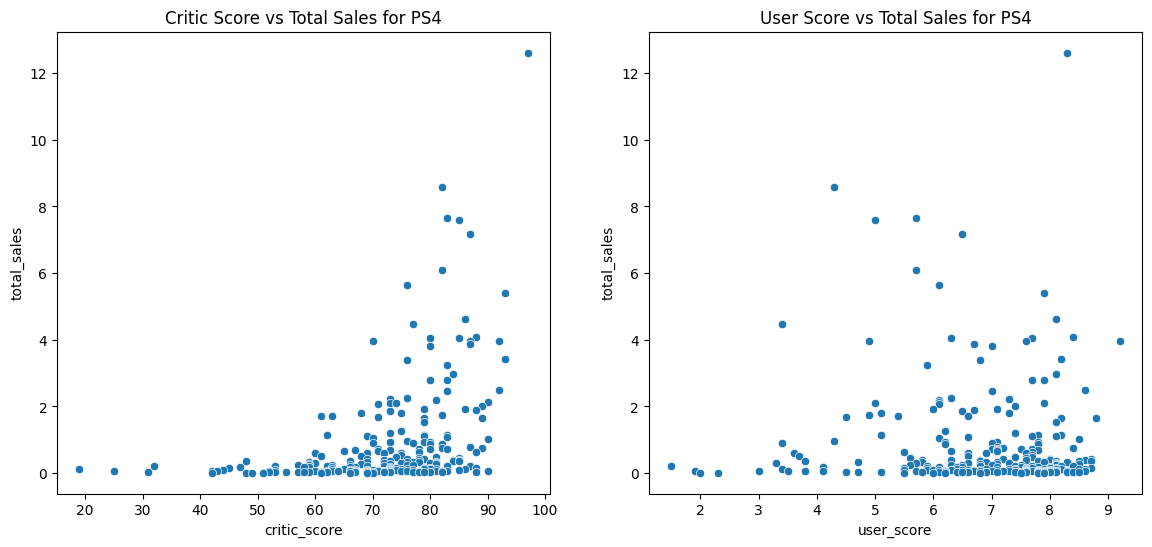

In [41]:
# Create scatter plots for both critic and user scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=popular_platform_data, x='critic_score', y='total_sales')
plt.title(f'Critic Score vs Total Sales for {popular_platform}')
plt.subplot(1, 2, 2)
sns.scatterplot(data=popular_platform_data, x='user_score', y='total_sales')
plt.title(f'User Score vs Total Sales for {popular_platform}')
plt.show()

In [42]:
# Calculate correlations
critic_corr = popular_platform_data['critic_score'].corr(popular_platform_data['total_sales'])
user_corr = popular_platform_data['user_score'].corr(popular_platform_data['total_sales'])
print(f"Correlation between Critic Score and Total Sales for {popular_platform}: {critic_corr:.2f}")
print(f"Correlation between User Score and Total Sales for {popular_platform}: {user_corr:.2f}")

Correlation between Critic Score and Total Sales for PS4: 0.40
Correlation between User Score and Total Sales for PS4: -0.04


##### Review Scores and PS4 Sales

Looking at the PS4 data, critic scores show a noticeable, but not perfect, connection to sales. Games with higher critic ratings, especially in the 80 to 90 range, tend to sell more. User scores matter too, but the pattern is much weaker. A lot of games with solid user ratings still end up with low sales.

Overall, good reviews help, but they do not guarantee strong performance. They are useful for spotting potential hits, but we cannot rely on them alone when deciding which games to promote in 2017.

##### Next Steps: Cross-Platform Comparison

Now that we understand how individual platforms perform, the next step is to look at games that were released on more than one platform. This will help us see whether cross-platform titles tend to sell better and if some platforms benefit more than others from shared releases. By comparing how the same game performs across different systems, we can get a better sense of where the real demand is and which platforms give certain titles the strongest boost.


In [43]:
# Find games released on multiple platforms
multi_platform_games = (
    games_relevant
    .groupby('name')
    .agg(platform_count=('platform', 'nunique'))
    .reset_index()
    .query('platform_count > 1')
)
multi_platform_games

,name,platform_count
5,2014 FIFA World Cup Brazil,2
7,3rd Super Robot Wars Z Jigoku Hen,2
8,3rd Super Robot Wars Z: Tengoku-Hen,2
10,7 Days to Die,2
20,Adventure Time: Finn & Jake Investigations,6
...,...,...
935,Yakuza: Ishin,2
943,Yoru no Nai Kuni,3
950,Zero Escape: Zero Time Dilemma,2
952,ZombiU,2


In [44]:
# Compare sales across platforms for these games
multi_platform_sales = games_relevant[games_relevant['name'].isin(multi_platform_games['name'])]
multi_platform_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


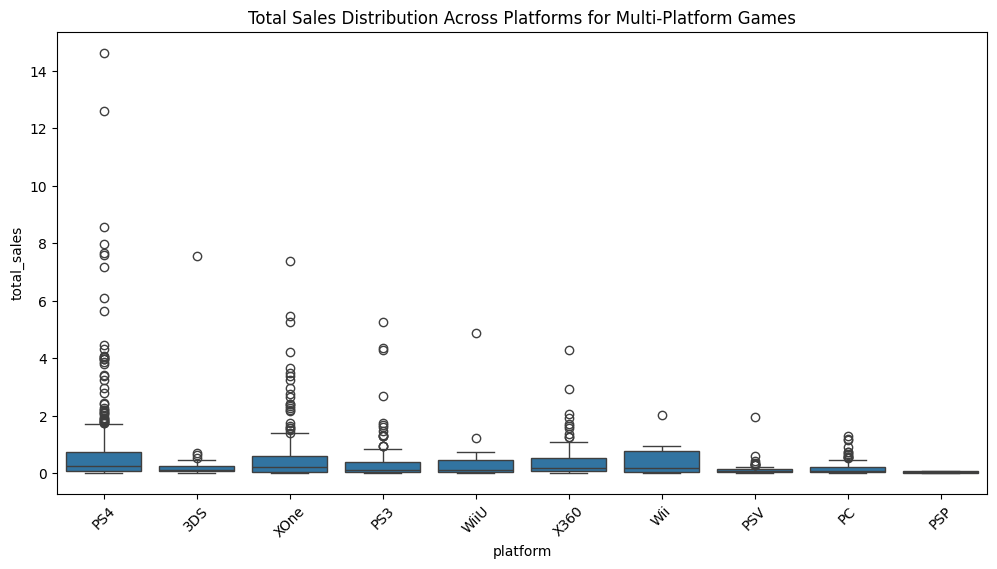

In [49]:
#visualize cross-platform performance
plt.figure(figsize=(12, 6))
sns.boxplot(data=multi_platform_sales, x='platform', y='total_sales')
plt.title('Total Sales Distribution Across Platforms for Multi-Platform Games')
plt.xticks(rotation=45)
plt.show()

##### Stakeholder Summary: Multi-Platform Game Sales

The sales distribution shows that multi-platform games perform very differently depending on the system. PS4 versions clearly sell the most, with several titles reaching very high sales numbers. Xbox One also shows solid performance, though not as strong as PS4.

Older platforms and handheld systems, like PS3, 3DS, X360, WiiU, and PSV, sit much lower, with smaller ranges and far fewer high selling titles. Platforms like Wii, PC, and PSP contribute very little to total sales for cross-platform releases.

Overall, the strongest sales for multi-platform games come from PS4 and Xbox One. These platforms offer the best opportunities for 2017 promotions, while the others show limited impact.

##### Next Steps: Genre Analysis

Now that we understand how different platforms perform, the next step is to look at game genres. This will help us see which genres consistently drive strong sales and which ones tend to underperform. By analyzing genre performance across the key years, we can identify the types of games that are most likely to succeed in 2017. This includes looking at total sales by genre, average sales per game, and how genres trend across different platforms. This analysis will give us a clearer picture of what kinds of titles are worth prioritizing in our marketing efforts.

In [58]:
# Analyze genre performance
# Sort genres by total sales
genre_sales = (
    games_relevant
    .groupby('genre', as_index=False)
    .agg(
        total_sales_sum=('total_sales', 'sum'),
        total_sales_mean=('total_sales', 'mean'),
        total_sales_median=('total_sales', 'median'),
        sales_std_dev=('total_sales', 'std')
    )
    .sort_values('total_sales_sum', ascending=False)
)
print("Genre Sales Statistics:")
display(genre_sales)

Genre Sales Statistics:


,genre,total_sales_sum,total_sales_mean,total_sales_median,sales_std_dev
0,Action,199.36,0.322068,0.090,0.798181
8,Shooter,170.94,1.335469,0.515,2.050567
10,Sports,109.48,0.680000,0.180,1.239736
7,Role-Playing,101.44,0.459005,0.110,1.177284
3,Misc,37.55,0.332301,0.090,0.736999
2,Fighting,28.22,0.470333,0.125,1.188053
6,Racing,27.52,0.398841,0.090,0.963716
4,Platform,18.09,0.476053,0.140,0.722561
1,Adventure,17.55,0.094865,0.030,0.203147
9,Simulation,13.13,0.298409,0.100,0.646925


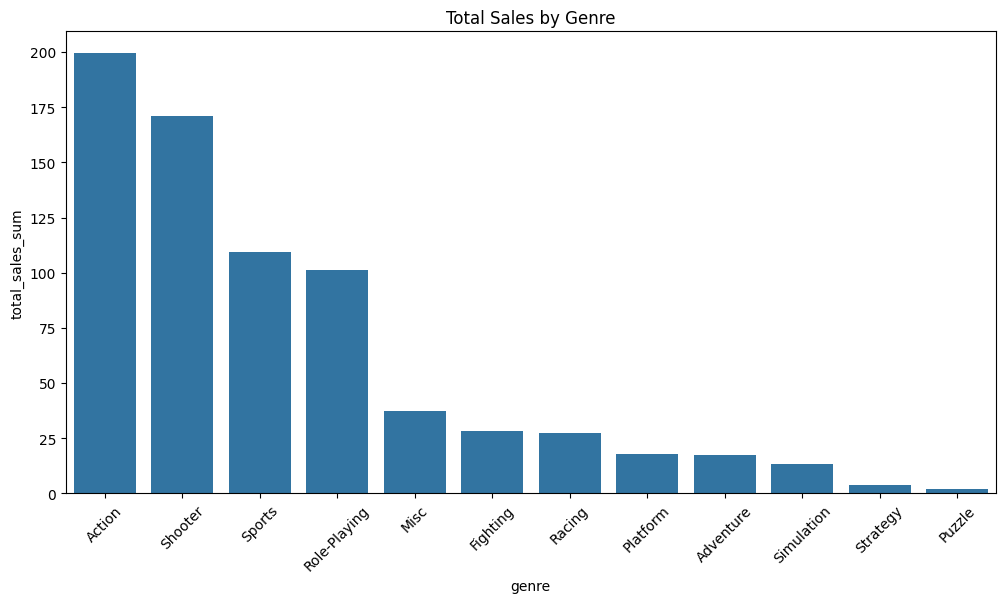

In [60]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales_sum')
plt.title('Total Sales by Genre')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Calculate market share for each genre
total_sales_all_genres = genre_sales['total_sales_sum'].sum()
genre_sales['market_share'] = genre_sales['total_sales_sum'] / total_sales_all_genres * 100
genre_sales

,genre,total_sales_sum,total_sales_mean,total_sales_median,sales_std_dev,market_share
0,Action,199.36,0.322068,0.090,0.798181,27.330180
8,Shooter,170.94,1.335469,0.515,2.050567,23.434094
10,Sports,109.48,0.680000,0.180,1.239736,15.008568
7,Role-Playing,101.44,0.459005,0.110,1.177284,13.906368
3,Misc,37.55,0.332301,0.090,0.736999,5.147714
2,Fighting,28.22,0.470333,0.125,1.188053,3.868668
6,Racing,27.52,0.398841,0.090,0.963716,3.772705
4,Platform,18.09,0.476053,0.140,0.722561,2.479951
1,Adventure,17.55,0.094865,0.030,0.203147,2.405922
9,Simulation,13.13,0.298409,0.100,0.646925,1.799986


#### Stakeholder Summary: Genre Performance

From the genre breakdown, a few categories clearly stand out. Action and Shooter games dominate the market and stay strong year after year. Sports and Role-Playing follow behind but still show solid demand.
The rest of the genres drop off pretty quickly. Fighting, Racing, Platform, and Adventure are steady but low impact. Strategy and Puzzle barely register.
Overall, the genres worth focusing on going into 2017 are Action, Shooter, Sports, and Role-Playing. These are the ones with real momentum and the best chance of driving strong sales.

##### Regional Market Analysis and User Profiles: Next Steps

The next move is to break things down by region so we can see how player preferences differ in North America, Europe, and Japan. We’ll look at which platforms do well in each region, which genres players prefer, and how ESRB ratings shape demand. This helps us understand who we’re really selling to and what types of games each market responds to.

In [66]:
# Function to analyze platform performance by region
def analyze_platform_by_region(df, platform):
    platform_data = df[df['platform'] == platform]
    region_sales = platform_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    print(f"Sales by Region for {platform}:")
    display(region_sales)

analyze_platform_by_region(games_relevant, 'PS4')
analyze_platform_by_region(games_relevant, 'XOne')
analyze_platform_by_region(games_relevant, '3DS')
analyze_platform_by_region(games_relevant, 'PS3')


Sales by Region for PS4:


na_sales        98.61
eu_sales       130.04
jp_sales        15.02
other_sales     44.48
dtype: float64

Sales by Region for XOne:


na_sales       81.27
eu_sales       46.25
jp_sales        0.32
other_sales    12.52
dtype: float64

Sales by Region for 3DS:


na_sales       22.64
eu_sales       16.12
jp_sales       44.24
other_sales     3.68
dtype: float64

Sales by Region for PS3:


na_sales       22.05
eu_sales       25.54
jp_sales       11.22
other_sales     9.37
dtype: float64

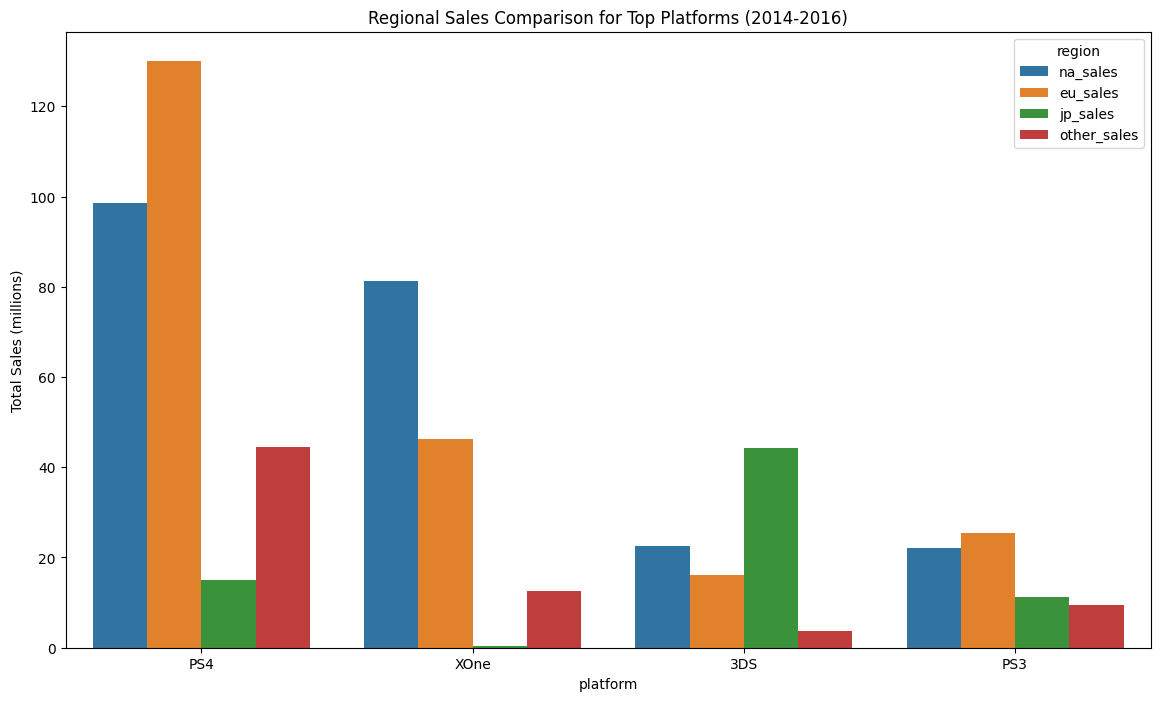

In [68]:
# Create a comparative platform analysis
# Visualize cross-regional comparison for top platforms
top_platforms = ['PS4', 'XOne', '3DS', 'PS3']
region_sales_data = []
for platform in top_platforms:
    platform_data = games_relevant[games_relevant['platform'] == platform]
    region_sales = platform_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
    region_sales.columns = ['region', 'sales']
    region_sales['platform'] = platform
    region_sales_data.append(region_sales)
region_sales_df = pd.concat(region_sales_data)
plt.figure(figsize=(14, 8))
sns.barplot(data=region_sales_df, x='platform', y='sales', hue='region')
plt.title('Regional Sales Comparison for Top Platforms (2014-2016)')
plt.ylabel('Total Sales (millions)')
plt.show()

##### Stakeholder Summary: Regional Platform Performance

Looking at regional sales, each platform shows its own strengths. PS4 leads across both North America and Europe by a wide margin, which confirms that these regions carry most of the demand for PS4 titles. Xbox One also performs well in these same regions, but at a lower level than PS4.

Japan tells a different story. The 3DS dominates this market, pulling in far more sales than the home consoles, while PS4 and Xbox One barely register. PS3 still has some presence in Japan, but nowhere near the 3DS.

Overall, the data shows that PS4 and Xbox One are the strongest platforms in Western markets, while Japan continues to favor handheld and legacy systems. This helps us tailor recommendations by region and focus marketing efforts where each platform performs best.

##### Regional Genre Analysis: Next step

Now that we understand how each region responds to different platforms, the next move is to look at genre preferences across North America, Europe, and Japan. This will help us see which genres each region gravitates toward and where the biggest opportunities are. By comparing regional tastes, we can figure out which types of games are worth promoting in each market as we plan for 2017.

In [70]:
# Function to analyze genre performance by region
def analyze_genre_by_region(df, genre):
    genre_data = df[df['genre'] == genre]
    region_sales = genre_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    print(f"Sales by Region for {genre} Genre:")
    display(region_sales)

analyze_genre_by_region(games_relevant, 'Action')
analyze_genre_by_region(games_relevant, 'Shooter')
analyze_genre_by_region(games_relevant, 'Sports')
analyze_genre_by_region(games_relevant, 'Role-Playing')

Sales by Region for Action Genre:


na_sales       72.53
eu_sales       74.68
jp_sales       29.58
other_sales    22.57
dtype: float64

Sales by Region for Shooter Genre:


na_sales       79.02
eu_sales       65.52
jp_sales        4.87
other_sales    21.53
dtype: float64

Sales by Region for Sports Genre:


na_sales       46.13
eu_sales       45.73
jp_sales        3.26
other_sales    14.36
dtype: float64

Sales by Region for Role-Playing Genre:


na_sales       33.47
eu_sales       28.17
jp_sales       31.16
other_sales     8.64
dtype: float64

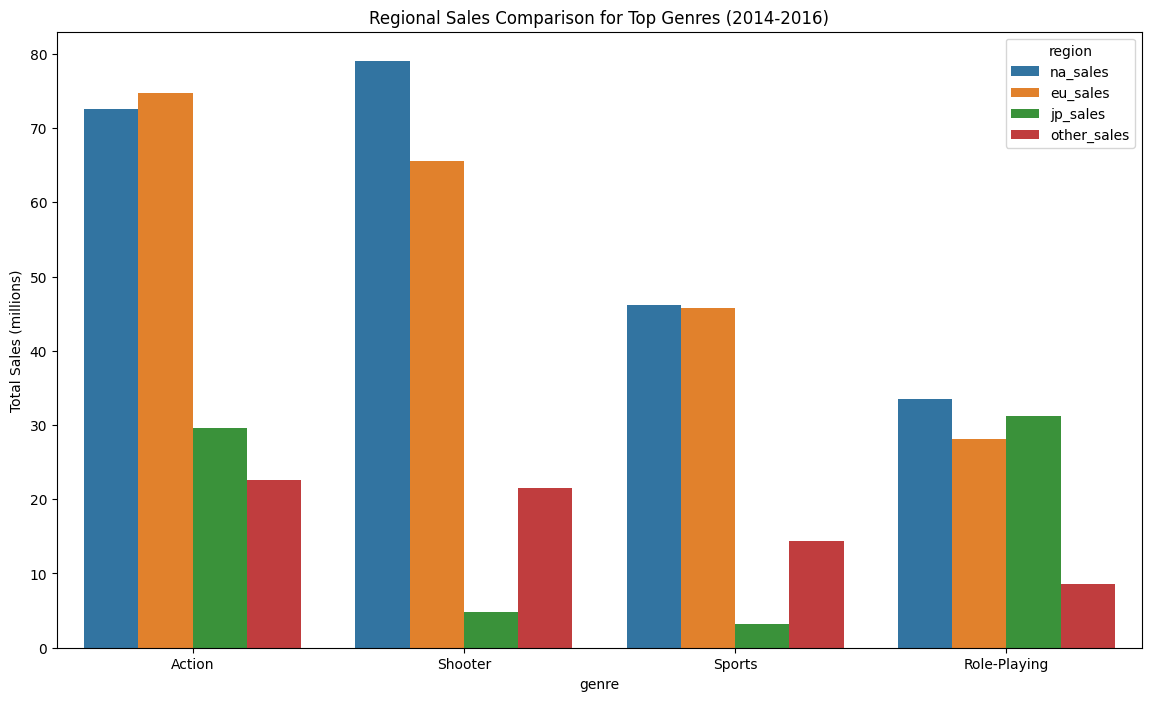

In [71]:
# Create a comparative genre analysis
# Visualize cross-regional comparison for top genres
top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing']

region_sales_data = []
for genre in top_genres:
    genre_data = games_relevant[games_relevant['genre'] == genre]
    region_sales = genre_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
    region_sales.columns = ['region', 'sales']
    region_sales['genre'] = genre
    region_sales_data.append(region_sales)
region_sales_df = pd.concat(region_sales_data)
plt.figure(figsize=(14, 8))
sns.barplot(data=region_sales_df, x='genre', y='sales', hue='region')
plt.title('Regional Sales Comparison for Top Genres (2014-2016)')
plt.ylabel('Total Sales (millions)')
plt.show()

##### Stakeholder Summary: Regional Genre Preferences

Looking at genre performance by region, a few patterns stand out clearly. Action and Shooter games dominate in both North America and Europe, showing very strong and consistent demand. These two regions buy far more of these genres than any others.

Japan looks very different. Role-Playing games are one of the strongest genres there, almost matching NA and EU levels even though Japan is a smaller market overall. Action still performs well in Japan, but Shooter and Sports barely move compared to the Western regions.

Across all regions, Sports performs solidly in NA and EU but has very limited traction in Japan.

Overall, this tells us that marketing should be tailored by region. Action and Shooter are the strongest global picks, but Role-Playing becomes especially important when targeting the Japanese market.